## 0. Download dataset
**Note:** If you can't download using gdown due to limited number of downloads, please download it manually and upload it to your drive, then copy it from the drive to colab.
```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Load dataset

In [19]:
dataset_path = '/content/drive/Othercomputers/My Laptop/Advanced/AIO_GIT/AI_Share_ALL_IN_ONE/Exercises/230903 -Decision Tree and Random Forest Solution- TA_Thang/Housing.csv'
df = pd.read_csv(dataset_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 3. Dealing with categorical data (optional)

### 3.1. Check categorical data

In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [22]:
for col_name in categorical_cols:
    n_categories = df[col_name].nunique()
    print(f'Number of categories in {col_name}: {n_categories}')

Number of categories in mainroad: 2
Number of categories in guestroom: 2
Number of categories in basement: 2
Number of categories in hotwaterheating: 2
Number of categories in airconditioning: 2
Number of categories in prefarea: 2
Number of categories in furnishingstatus: 3


### 3.2. Encode Categorical Data

In [23]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(
    df[categorical_cols]
)
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns=categorical_cols
)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat(
    [numerical_df, encoded_categorical_df], axis=1
)

In [24]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Normalization

In [25]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)

## 6. Train test split

In [26]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [27]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [28]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')

Number of training samples: 381
Number of val samples: 164


## 6. Training

In [29]:
regressor = RandomForestRegressor(
    random_state=random_state
)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

## 7. Evaluation

In [30]:
y_pred = regressor.predict(X_val)

In [31]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.46093873321571177
Mean Squared Error: 0.37944418523089524


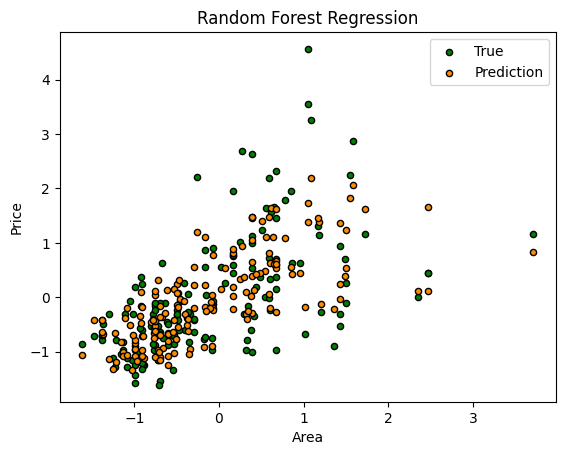

In [32]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()